In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from numpy.random import randn
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [3]:
data = pd.read_csv("obesity_child_age.csv")

In [4]:
data.shape

(99, 6)

In [5]:
data.tail()

,index,Time,Age,Gender,PercentObese,SE
94,94,"[2005,2006]","[12,19]",F,17.3,-2.1
95,95,"[2007,2008]","[12,19]",F,16.8,-2.0
96,96,"[2009,2010]","[12,19]",F,17.1,-1.3
97,97,"[2011,2012]","[12,19]",F,20.7,-2.0
98,98,"[2013,2014]","[12,19]",F,21.4,-3.2


In [6]:
data.columns

Index(['index', 'Time', 'Age', 'Gender', 'PercentObese', 'SE'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         99 non-null     int64  
 1   Time          99 non-null     object 
 2   Age           99 non-null     object 
 3   Gender        99 non-null     object 
 4   PercentObese  99 non-null     float64
 5   SE            99 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


In [8]:
data.isnull().sum()

index           0
Time            0
Age             0
Gender          0
PercentObese    0
SE              0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data1 = data

In [11]:
#delete index row
data1.drop('index', axis=1, inplace=True)

In [12]:
#separating Time into StartYear and EndYear
#separating Age into MinAge and MaxAge
from sklearn.preprocessing import StandardScaler
# data['Time'] = data['Time'].apply(lambda x: [int(year) for year in x.strip('[]').split(',')])
# data['StartYear'] = data['Time'].apply(lambda x: x[0])
# data['EndYear'] = data['Time'].apply(lambda x: x[1])
# data.drop('Time', axis=1, inplace=True)

data1['StartYear'] = data1['Time'].apply(lambda x: int(x.strip('[]').split(',')[0]))
data1['EndYear'] = data1['Time'].apply(lambda x: int(x.strip('[]').split(',')[1]))
data1.drop('Time', axis=1, inplace=True)

# 1. Convert string representations of age ranges to separate minimum and maximum ages
# Extract minimum and maximum ages from the list
data1.Age = data1.Age.str.strip('[]')
data1[['MinAge', 'MaxAge']] = data1['Age'].str.extract("(\d+),(\d+)", expand=True).astype(int)
data1.drop('Age', axis=1, inplace=True)

In [13]:
#get dummies for gender column
gender = pd.get_dummies(data1.Gender)
data1 = data1.join(gender)
data1.drop('Gender', axis=1, inplace=True)
data1 = data1.replace(to_replace = [True,False],value = ['1','0'])

In [14]:
data1.head()

,PercentObese,SE,StartYear,EndYear,MinAge,MaxAge,All,F,M
0,5.0,-0.6,1971,1974,2,5,1,0,0
1,5.0,-0.6,1976,1980,2,5,1,0,0
2,7.2,-0.7,1988,1994,2,5,1,0,0
3,10.3,-1.7,1999,2000,2,5,1,0,0
4,10.6,-1.8,2001,2002,2,5,1,0,0


In [15]:
data1['M'] = data1['M'].astype(str).astype(int)
data1['F'] = data1['F'].astype(str).astype(int)
data1['All'] = data1['All'].astype(str).astype(int)

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PercentObese  99 non-null     float64
 1   SE            99 non-null     float64
 2   StartYear     99 non-null     int64  
 3   EndYear       99 non-null     int64  
 4   MinAge        99 non-null     int32  
 5   MaxAge        99 non-null     int32  
 6   All           99 non-null     int32  
 7   F             99 non-null     int32  
 8   M             99 non-null     int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 5.2 KB


In [17]:
from ctgan import CTGAN

# initialize the CTGAN model
model = CTGAN()

# fit the model to the original data
model.fit(data1)

# generate synthetic data
synthetic_data = model.sample(len(data1))
synthetic_data1 = model.sample(len(data1))
synthetic_data2 = model.sample(len(data1))
synthetic_data3 = model.sample(len(data1))
synthetic_data4 = model.sample(len(data1))

# save the synthetic data to a CSV file
synthetic_data.to_csv('synthetic_data.csv', index=False)
synthetic_data1.to_csv('synthetic_data1.csv', index=False)
synthetic_data2.to_csv('synthetic_data2.csv', index=False)
synthetic_data3.to_csv('synthetic_data3.csv', index=False)
synthetic_data4.to_csv('synthetic_data4.csv', index=False)

In [18]:
synthetic_data.head()

,PercentObese,SE,StartYear,EndYear,MinAge,MaxAge,All,F,M
0,14.834793,-0.989620,2001,1993,11,11,0,1,1
1,20.476437,-1.263624,1983,2020,13,19,1,1,0
2,14.325463,-2.599274,1968,1998,9,11,0,0,1
3,16.558196,-2.275957,1969,2002,11,17,1,0,0
4,25.137102,-2.486072,2015,1964,12,19,0,0,0


In [19]:
data2 = pd.concat([data1,synthetic_data], ignore_index=True)
data2 = pd.concat([data2,synthetic_data1], ignore_index=True)
data2 = pd.concat([data2,synthetic_data2], ignore_index=True)
data2 = pd.concat([data2,synthetic_data3], ignore_index=True)
data2 = pd.concat([data2,synthetic_data4], ignore_index=True)

In [20]:
data2.head()

,PercentObese,SE,StartYear,EndYear,MinAge,MaxAge,All,F,M
0,5.0,-0.6,1971,1974,2,5,1,0,0
1,5.0,-0.6,1976,1980,2,5,1,0,0
2,7.2,-0.7,1988,1994,2,5,1,0,0
3,10.3,-1.7,1999,2000,2,5,1,0,0
4,10.6,-1.8,2001,2002,2,5,1,0,0


In [21]:
data2.to_csv('data2.csv', index=False)

<Axes: >

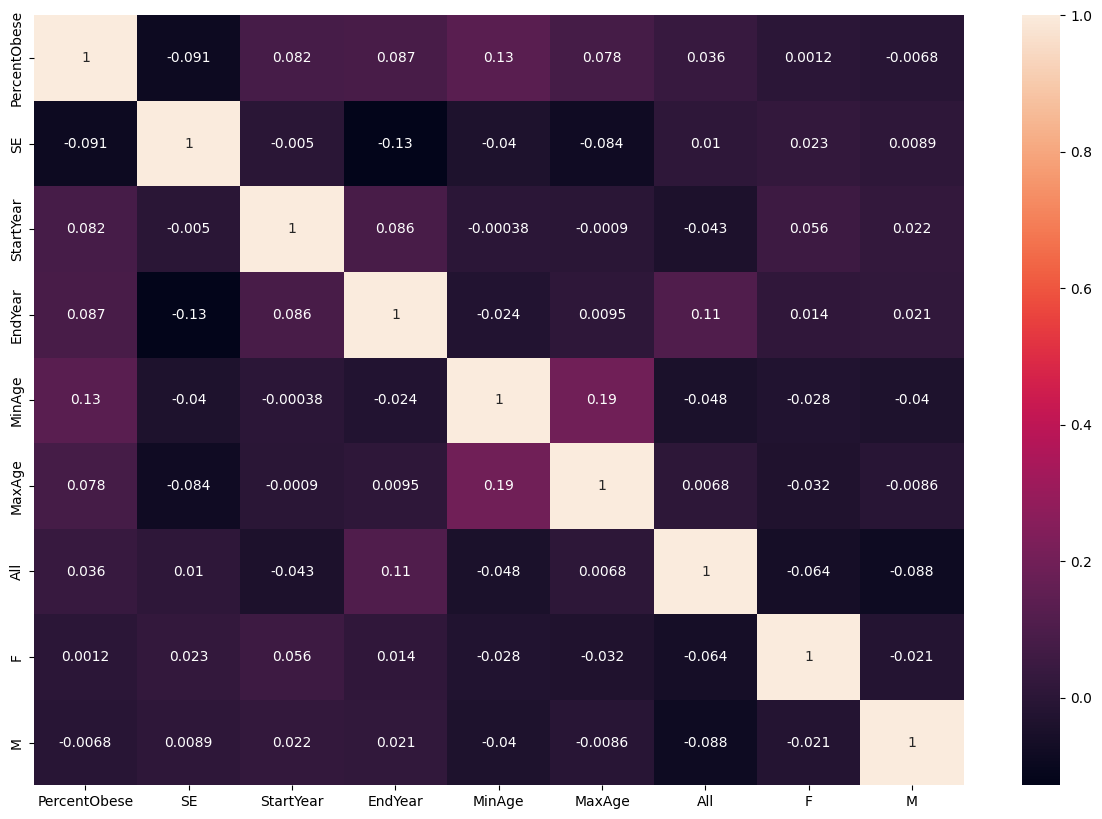

In [22]:
#correlation map
plt.figure(figsize=(15,10))
sns.heatmap(data2.corr(), annot = True)

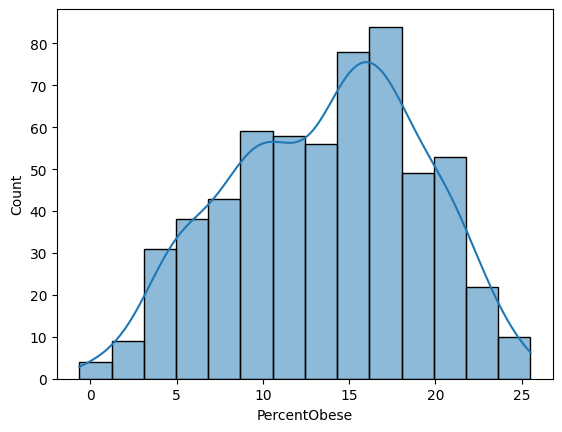

In [23]:
sns.histplot(data=data2, x='PercentObese', kde=True)
plt.show()

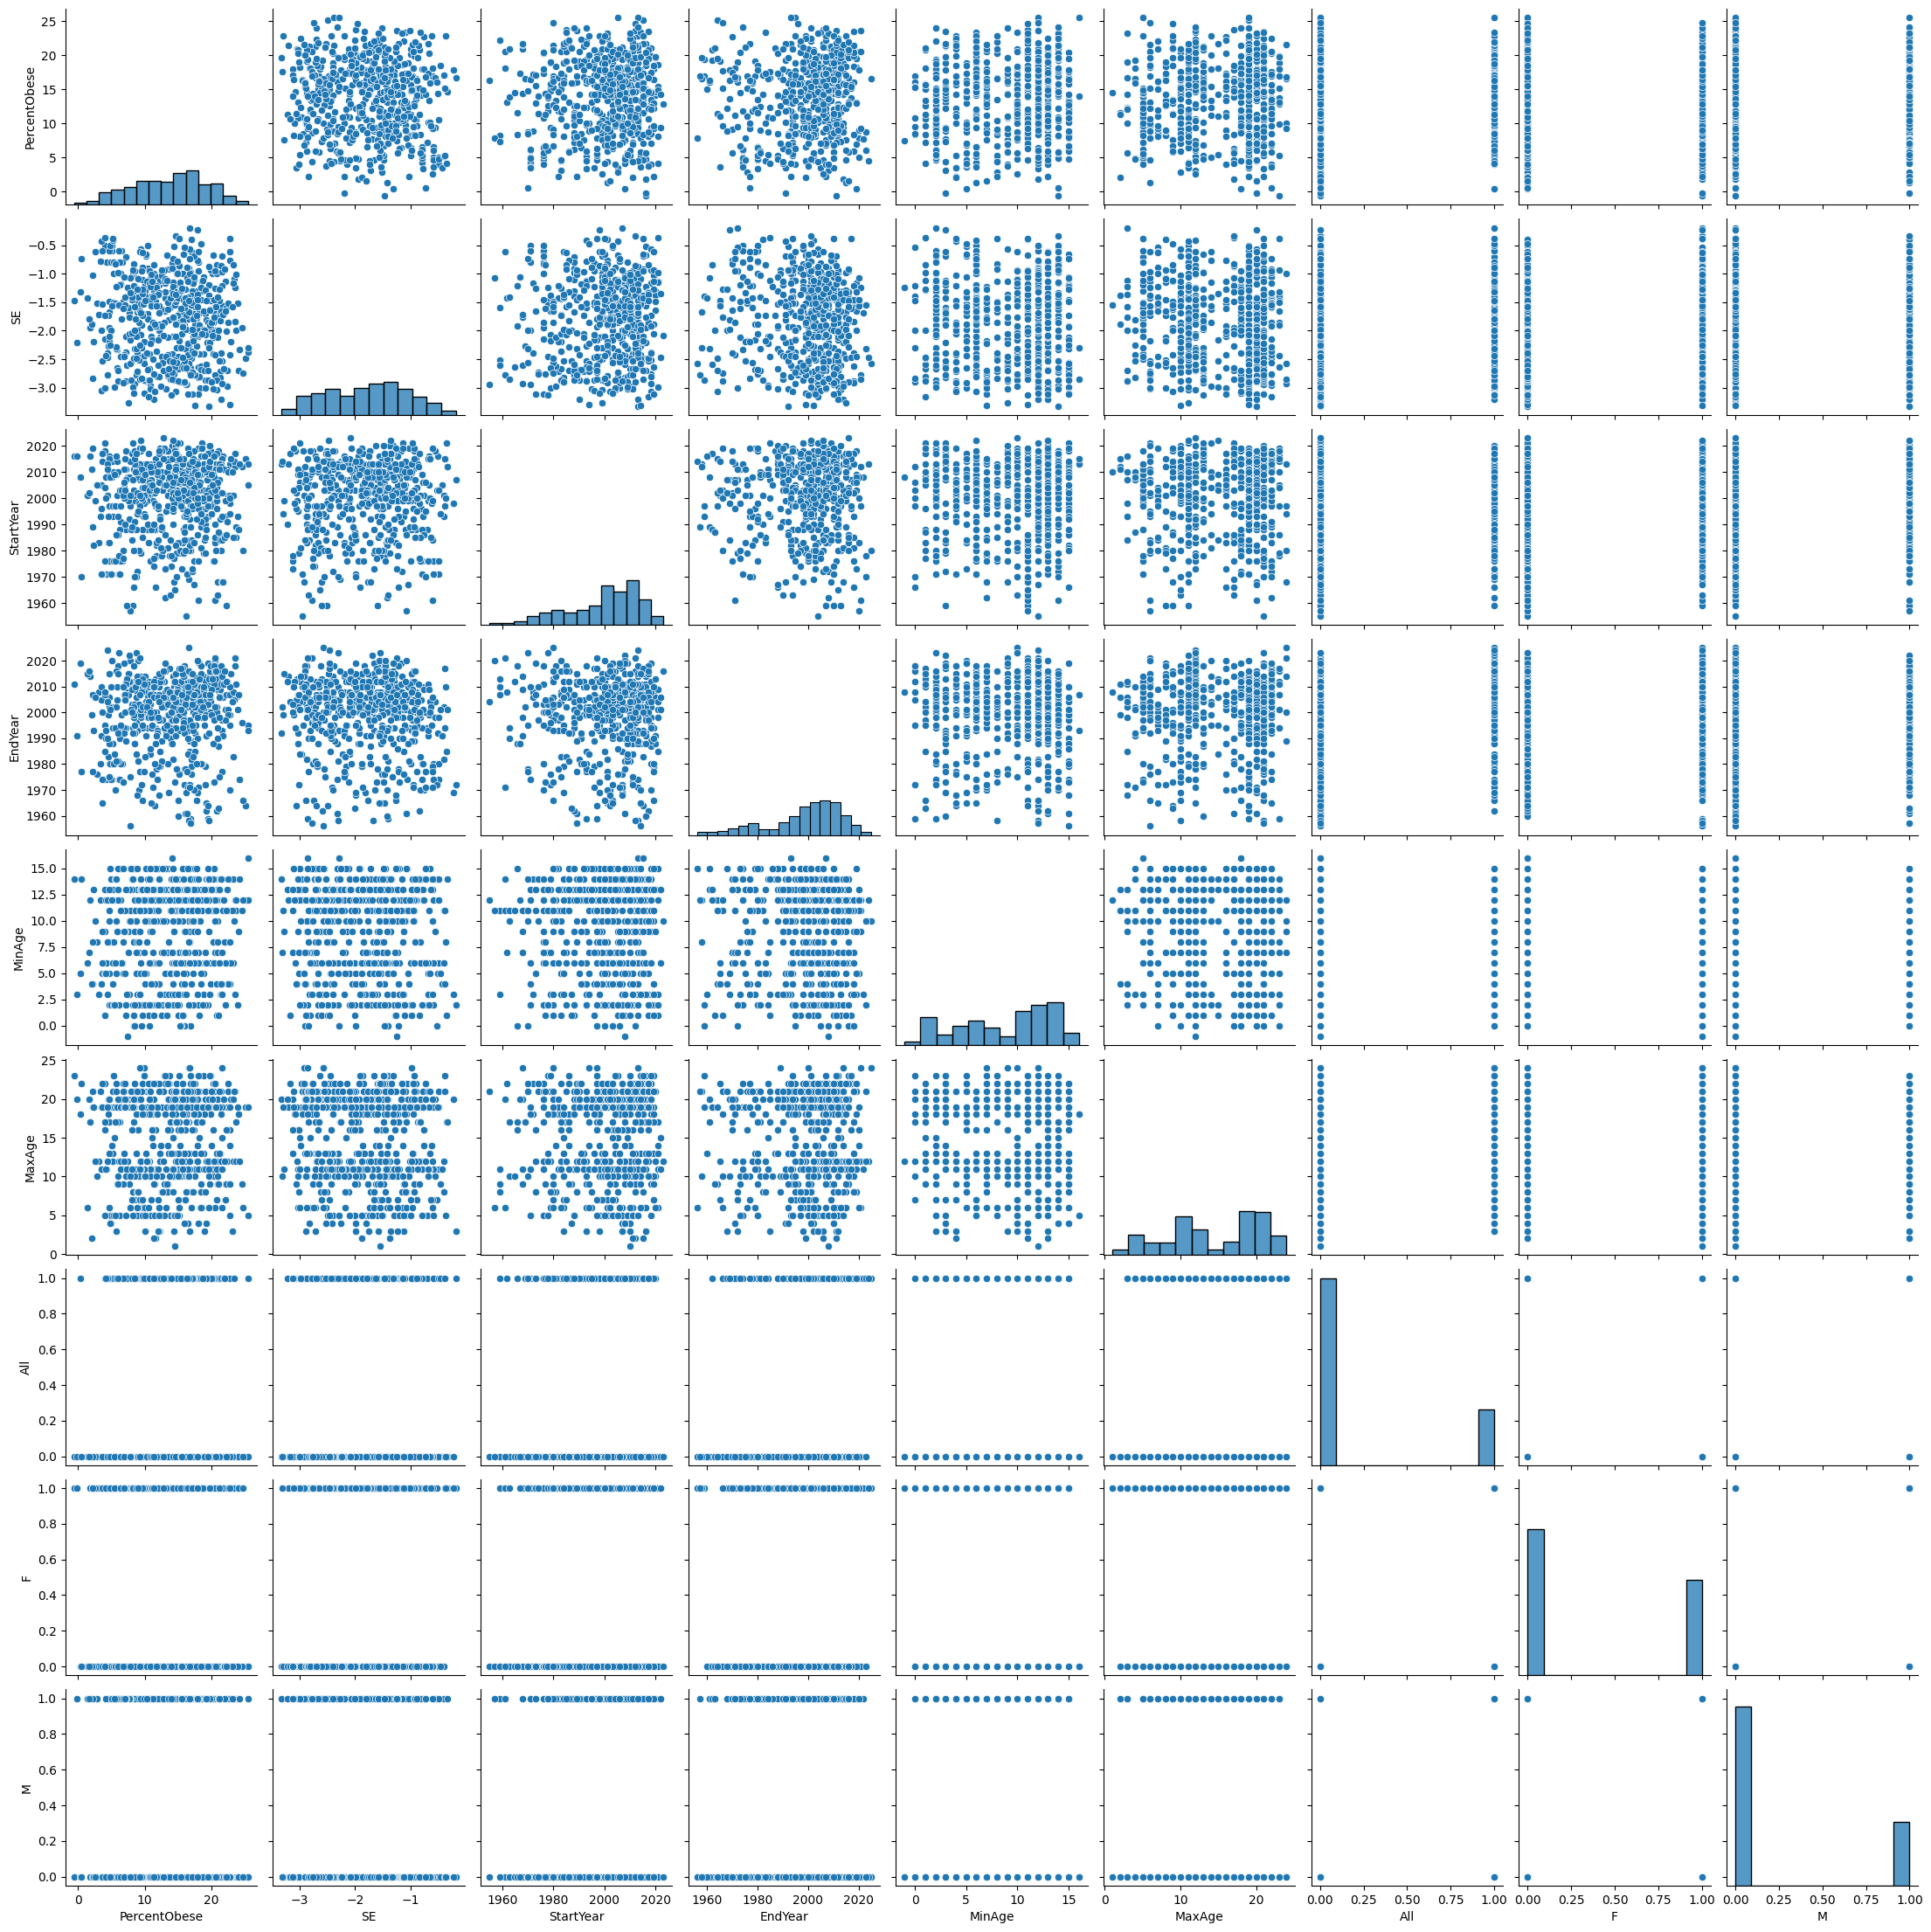

In [24]:
sns.pairplot(data2)
plt.show()

In [25]:
# 3. Standardize the continuous-valued features 'Age' and 'PercentObese'
continuous_features = ['PercentObese', 'MinAge', 'MaxAge']
scaler = StandardScaler()
data2[continuous_features] = scaler.fit_transform(data2[continuous_features])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import metrics, ensemble
from pandas import Series, DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from hmmlearn import hmm

In [27]:
X=data2.drop(['PercentObese','SE'],axis=1)
Y=data2['PercentObese']

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.25, random_state=20)
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

train_data = X_train.join(Y_train)
test_data = X_test.join(Y_test)
val_data = x_val.join(y_val)
train_data.head()

,StartYear,EndYear,MinAge,MaxAge,All,F,M,PercentObese
547,2000,2002,-1.569099,0.772424,1,1,0,0.929370
167,2009,2019,0.736801,1.112920,0,0,1,0.829898
570,2017,1997,1.197981,1.112920,0,0,0,0.190731
585,2005,1976,0.045031,0.261678,0,1,0,-0.455164
303,2020,2013,0.045031,-1.440806,0,1,0,1.085079


array([[<Axes: title={'center': 'StartYear'}>,
        <Axes: title={'center': 'EndYear'}>,
        <Axes: title={'center': 'MinAge'}>],
       [<Axes: title={'center': 'MaxAge'}>,
        <Axes: title={'center': 'All'}>, <Axes: title={'center': 'F'}>],
       [<Axes: title={'center': 'M'}>,
        <Axes: title={'center': 'PercentObese'}>, <Axes: >]], dtype=object)

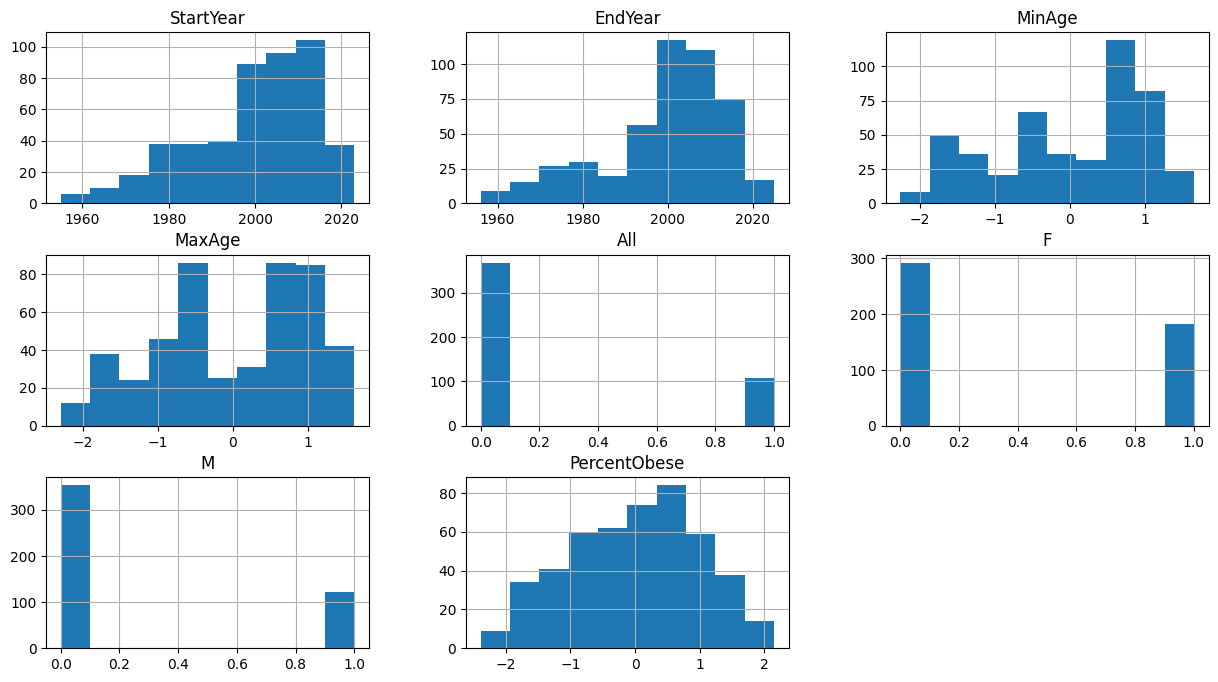

In [29]:
train_data.hist(figsize=(15,8))

In [44]:
# Gradient Boosting Algorithm
gb_model = GradientBoostingRegressor(**params)
gb_model.fit(x_train, y_train)

# Predict the target variable for the validation set using Gradient Boosting
gb_y_pred_val = gb_model.predict(x_val)

# Calculate mean squared error (MSE) and R-squared (R^2) for Gradient Boosting
gb_mse = mean_squared_error(y_val, gb_y_pred_val)
gb_r2 = r2_score(y_val, gb_y_pred_val)

print("MSE Value: ", gb_mse, "\n")

print("R^2 Score Value: ", gb_r2)

MSE Value:  1.1295206818842947 

R^2 Score Value:  0.04668833705101405


In [42]:
measures = pd.DataFrame(np.column_stack((gb_model.predict(X_test), y_test)), columns=['prediction', 'actual'])
measures['error'] = measures.iloc[:,0] - measures.iloc[:,1]
measures.head(10)

,prediction,actual,error
0,-0.083716,-1.015480,0.931764
1,-0.531520,0.270011,-0.801531
2,0.971999,-1.078764,2.050763
3,0.235694,1.051132,-0.815438
4,0.136775,1.004776,-0.868001
5,0.644881,-0.164191,0.809071
6,0.315067,-0.417475,0.732542
7,0.072820,-0.417475,0.490295
8,0.790074,0.321116,0.468958
9,-0.070092,0.125277,-0.195368


In [50]:
# Hidden Markov Model (HMM)
hmm_model = hmm.GaussianHMM(n_components=2)  # Adjust the number of components as needed
hmm_model.fit(x_train)

# Predict the target variable for the validation set using HMM
hmm_y_pred_val = hmm_model.predict(x_val)

# Calculate mean squared error (MSE) and R-squared (R^2) for HMM
hmm_mse = mean_squared_error(y_val, hmm_y_pred_val)
hmm_r2 = r2_score(y_val, hmm_y_pred_val)

# Print the results
print("MSE Value: ", hmm_mse, "\n")

print("R^2 Score Value (Test): ", hmm_r2)


MSE Value:  1.6926884137262768 

R^2 Score Value (Test):  -0.4286233376904003


In [51]:
measures = pd.DataFrame(np.column_stack((hmm_model.predict(X_test), y_test)), columns=['prediction', 'actual'])
measures['error'] = measures.iloc[:,0] - measures.iloc[:,1]
measures.head(10)

,prediction,actual,error
0,1.0,-1.015480,2.015480
1,1.0,0.270011,0.729989
2,1.0,-1.078764,2.078764
3,1.0,1.051132,-0.051132
4,0.0,1.004776,-1.004776
5,0.0,-0.164191,0.164191
6,0.0,-0.417475,0.417475
7,0.0,-0.417475,0.417475
8,0.0,0.321116,-0.321116
9,0.0,0.125277,-0.125277
